<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>

<h1 align="center"><font size="5">Supervised Machine Learning: Classification - Final Assignment</font></h1>


## Instructions:

In this Assignment, you will demonstrate the data regression skills you have learned by completing this course. You are expected to leverage a wide variety of tools, but also this report should focus on present findings, insights, and next steps. You may include some visuals from your code output, but this report is intended as a summary of your findings, not as a code review. 

The grading will center around 5 main points:

1. Does the report include a section describing the data?
2. Does the report include a paragraph detailing the main objective(s) of this analysis?
3. Does the report include a section with variations of classifier models and specify which one is the model that best suits the main objective(s) of this analysis?
4. Does the report include a clear and well-presented section with key findings related to the main objective(s) of the analysis?
5. Does the report highlight possible flaws in the model and a plan of action to revisit this analysis with additional data or different predictive modeling techniques? 

## Import the required libraries


The following required modules are pre-installed in the Skills Network Labs environment. However if you run this notebook commands in a different Jupyter environment (e.g. Watson Studio or Ananconda) you will need to install these libraries by removing the `#` sign before `!mamba` in the code cell below.


In [1]:
# All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented.
# !mamba install -qy pandas==1.3.4 numpy==1.21.4 seaborn==0.9.0 matplotlib==3.5.0 scikit-learn==0.20.1
# Note: If your environment doesn't support "!mamba install", use "!pip install"

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_recall_fscore_support 
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV


import warnings
warnings.filterwarnings("ignore")   # to ignore all warnings

## Importing the Dataset


Before you begin, you will need to choose a data set that you feel passionate about. You can brainstorm with your peers about great public data sets using the discussion board in this module.


Read your chosen dataset into pandas dataframe:


In [3]:
data = pd.read_csv('diabetes_prediction_dataset.csv')           # Read the csv file
data.head()                                                     # Show data record examples

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [4]:
print('cateogory values of smoking history:\n', data['smoking_history'].unique())
print('\n')
print('category values of gender:\n', data['gender'].unique())
print('\n')
print('number counts of gender:\n', data['gender'].value_counts())

cateogory values of smoking history:
 ['never' 'No Info' 'current' 'former' 'ever' 'not current']


category values of gender:
 ['Female' 'Male' 'Other']


number counts of gender:
 gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64


Once you have selected a data set, you will produce the deliverables listed below and submit them to one of your peers for review. Treat this exercise as an opportunity to produce analysis that are ready to highlight your analytical skills for a senior audience, for example, the Chief Data Officer, or the Head of Analytics at your company.
Sections required in your report:

* Main objective of the analysis that specifies whether your model will be focused on prediction or interpretation and the benefits that your analysis provides to the business or stakeholders of this data.
* Brief description of the data set you chose, a summary of its attributes, and an outline of what you are trying to accomplish with this analysis.
* Brief summary of data exploration and actions taken for data cleaning and feature engineering.
* Summary of training at least three different classifier models, preferably of different nature in explainability and predictability. For example, you can start with a simple logistic regression as a baseline, adding other models or ensemble models. Preferably, all your models use the same training and test splits, or the same cross-validation method.
* A paragraph explaining which of your classifier models you recommend as a final model that best fits your needs in terms of accuracy and explainability.
* Summary Key Findings and Insights, which walks your reader through the main drivers of your model and insights from your data derived from your classifier model.
* Suggestions for next steps in analyzing this data, which may include suggesting revisiting this model after adding specific data features that may help you achieve a better explanation or a better prediction. prediction.


# 1. About the Data


-----------------------------------------
#### `Datasets Information:`
-----------------------------------------
In this project, we'll showcase supervised classification methods to predict patient with diabetes using a publicly available dataset from Kaggle (https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset). The Diabetes prediction dataset include medical and demographic data (such as gender, age, hypertension, bmi, etc.) from patients and their diabetes status (positive or negative). 


##### <u> Attribute Information: </u>

1. **gender:** refers to the biological sex of the individual, male, female or other.
2. **age:** an important factor as diabetes is more commonly found in older adults, ranging from 0-80.
3. **hypertension:** a medical condition in which the blood pressure in the arteries is persistently elevated (0 or 1).
4. **heart_disease:** another medical condition that is associated with an increased risk of developing diabetes (0 or 1).
5. **smoking_history:**  also considered a risk factor for diabetes and can exacerbate the complications, (never, No Info, current, former, ever, not current). 
6. **bmi:** Body Mass Index is a measure of body fat based on weight and height. Higher BMI values are linked to a higher risk.
7. **HbA1c_level:** (Hemoglobin A1c) level is a measure of a person's average blood sugar level over the past 2-3 months. It is determined by assessing the percentage of hemoglobin, a protein in red blood cells, that is coated with sugar (glycated).
   - An HbA1c level below 5.7% is considered normal.
   - An HbA1c level between 5.7% and 6.4% indicates prediabetes.
   - An HbA1c level of 6.5% or higher on two separate tests indicates diabetes.
9. **blood_glucose_level:** refers to the amount of glucose in the bloodstream at a given time. Fasting Blood Glucose Test often measures blood sugar after an overnight fast.
   - Normal: Below 100 mg/dL.
   - Prediabetes: 100-125 mg/dL.
   - Diabetes: 126 mg/dL or higher on two separate tests.
10. **diabetes:**  the target variable being predicted (0 or 1). The values of 1 indicating the presence of diabetes.

### **Diabetes Common Risk Factors**
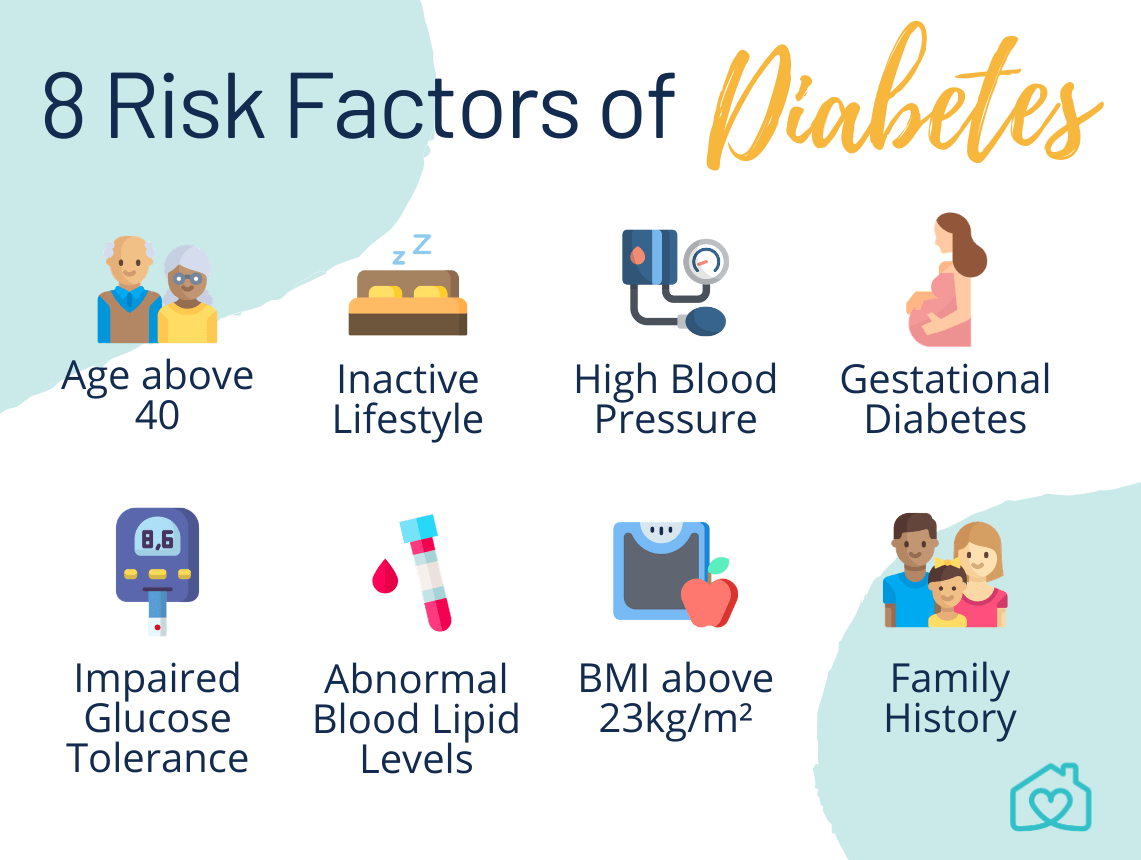

------------------------------------
#### `Exploratory Data Analysis, Data Cleaning, and Feature Engineering:`
------------------------------------
##### a. Univariate analysis

- Data types and description of the independent attributes,including (name, meaning, range of values observed, central values (mean and median), standard deviation and quartiles, analysis of the body of distributions / tails, missing values, outliers, duplicates. Visualize the analysis using boxplots, histograms, or density curves, etc.

In [5]:
# check data types   
data.info()           

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [6]:
# check data shape
data.shape         

(100000, 9)

In [7]:
# Check missing data (Null Values)  
data.isnull().sum()  

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [8]:
# drop duplicate rows in the dataframe
data.drop_duplicates(inplace=True, keep='last')  
data

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
5,Female,20.0,0,0,never,27.32,6.6,85,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [9]:
#Dropping not acceptable negative values if any
data = data.loc[~((data['age'] <= 0) | (data['bmi'] <= 0) | (data['HbA1c_level'] <= 0)|(data['blood_glucose_level'] <= 0))]
data = data.loc[~(data['gender'] == 'Other')]
data

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
5,Female,20.0,0,0,never,27.32,6.6,85,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


##### Insight: 
- There is no NA data. So far we do not need to do additional changes to the dataframe considering missing values.
- There are duplicated rows in the table, we need to remove the duplicate rows as they represent the same correlation between the input and output variables.
- Remove the nonsense data in the dataframe. For example, there is a gender category "other" with 18 data records. 

In [10]:
#Count of Unique Values in Each Column
data.nunique()

gender                    2
age                     102
hypertension              2
heart_disease             2
smoking_history           6
bmi                    4247
HbA1c_level              18
blood_glucose_level      18
diabetes                  2
dtype: int64

#### Insight: 
- From data type and the unique values, we can conclude that gender, hypertension, hear_disease, and diabetes are binary categorical values. Smoking_history has multiple categories. Other attributes are continuous numerical values.

Attribute: gender
Female    0.584231
Male      0.415769
Name: proportion, dtype: float64
Attribute: hypertension
0    0.922385
1    0.077615
Name: proportion, dtype: float64
Attribute: heart_disease
0    0.95919
1    0.04081
Name: proportion, dtype: float64
Attribute: diabetes
0    0.911763
1    0.088237
Name: proportion, dtype: float64


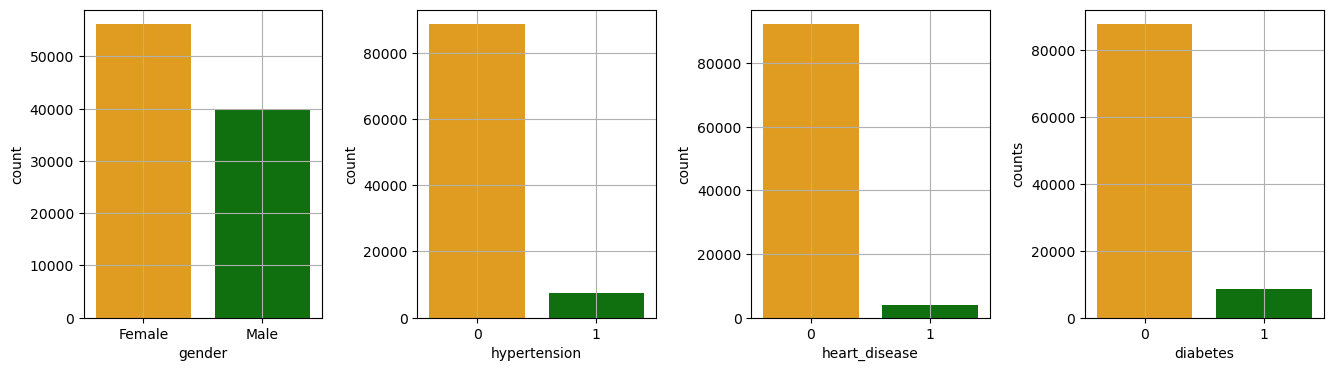

In [11]:
# Check for the count plots for the binary categorical attributes
List_binary = ['gender', 'hypertension', 'heart_disease', 'diabetes']
num_plots = len(List_binary)
num_rows = 1  # Add 1 and then floor division to ensure at least 2 rows
num_cols = int(len(List_binary)/ num_rows)
custom_palette = ['orange', 'green', 'cyan', 'grey', 'red', 'magenta']

fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 4))

# Flatten the axes array for easy iteration
axes = axes.flatten()

for i, column in enumerate(List_binary):
    print('Attribute:', data[column].value_counts(normalize=True))   
    sns.countplot(x=column, data=data, ax = axes[i], palette=custom_palette)
    plt.xlabel(column)
    plt.ylabel('counts')
    axes[i].grid(True)

plt.subplots_adjust(hspace=1, wspace=0.4)
plt.show()

diabetes  gender
0         Female    0.590033
          Male      0.409967
1         Female    0.524287
          Male      0.475713
Name: proportion, dtype: float64
diabetes  hypertension
0         0               0.938674
          1               0.061326
1         0               0.754067
          1               0.245933
Name: proportion, dtype: float64
diabetes  heart_disease
0         0                0.969696
          1                0.030304
1         0                0.850625
          1                0.149375
Name: proportion, dtype: float64
diabetes
0    1.0
1    1.0
Name: proportion, dtype: float64


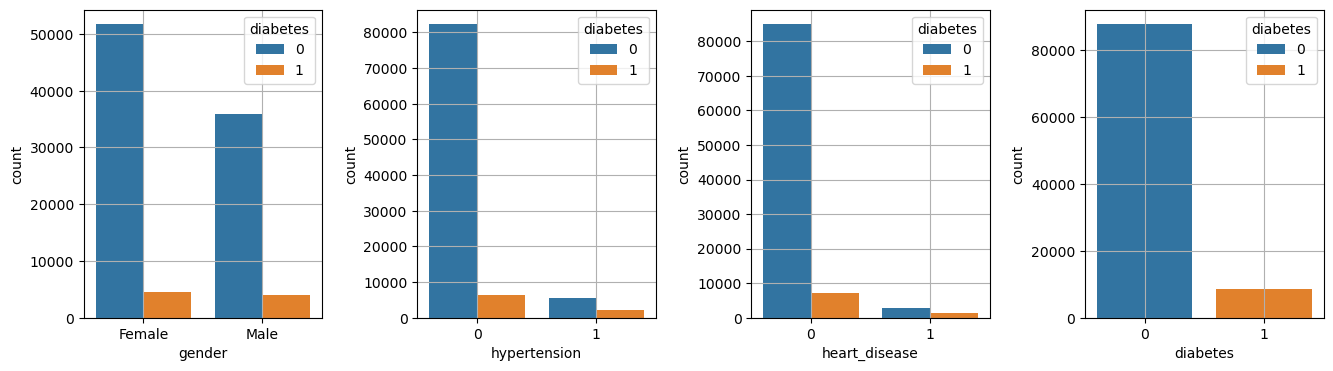

In [12]:
for x in List_binary:
    print(data.groupby('diabetes')[x].value_counts(normalize=True))                                 # count categorical columns based on group

fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 4))
for i, column in enumerate(List_binary):
    sns.countplot(x=column, data=data, ax = axes[i],  hue='diabetes')
    axes[i].grid(True)
    
plt.subplots_adjust(hspace=1, wspace=0.4)
plt.show()

Attribute: smoking_history
never          34395
No Info        32881
former          9299
current         9197
not current     6359
ever            3997
Name: count, dtype: int64
diabetes  smoking_history
0         No Info            0.358670
          never              0.354357
          current            0.094117
          former             0.087956
          not current        0.064681
          ever               0.040219
1         never              0.393421
          former             0.187456
          No Info            0.170361
          current            0.111766
          not current        0.081349
          ever               0.055647
Name: proportion, dtype: float64


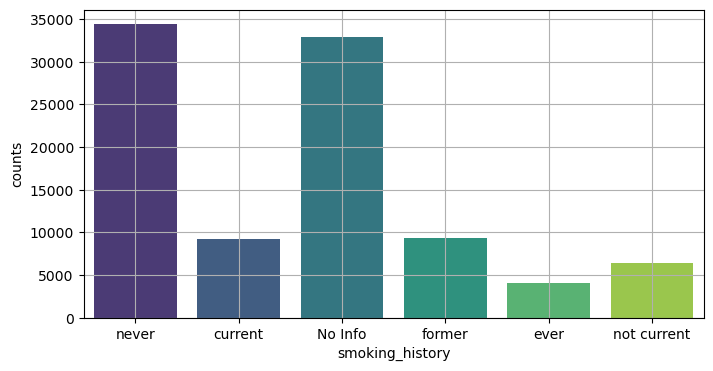

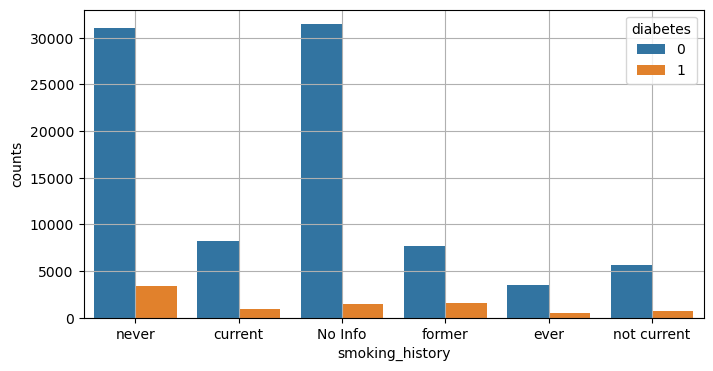

In [13]:
# Display the count plot for the smoking history
col_name = 'smoking_history'
print('Attribute:', data[col_name].value_counts())
plt.figure(figsize=(8, 4))
sns.countplot(x=col_name, data=data, palette='viridis')
plt.xlabel(col_name)
plt.ylabel('counts')
plt.grid(True)

col_name = 'smoking_history'
print(data.groupby('diabetes')[col_name].value_counts(normalize=True))
plt.figure(figsize=(8, 4))
sns.countplot(x=col_name, data=data, hue = 'diabetes')
plt.xlabel(col_name)
plt.ylabel('counts')
plt.grid(True)

#### Insight: 
- Man has a higher chance for diabetes than women.
- Patient with heart disease and hypertension has a higher chance for diabetes.
- Patient with smoking history has a higher chance for diabetes.
- The target prediction diabetes shows an imbalanced distribution > 10:1. This indicates that we need to use different approaches, such as upsampling, downsampling, resampling during the training process.

In [14]:
# statistic Summary, only continuous numerical variables are compared
List_con = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
data[List_con].describe().transpose()    

,count,mean,std,min,25%,50%,75%,max
age,96128.0,41.796617,22.463329,0.08,24.0,43.00,59.00,80.00
bmi,96128.0,27.321450,6.767811,10.01,23.4,27.32,29.86,95.69
HbA1c_level,96128.0,5.532633,1.073225,3.50,4.8,5.80,6.20,9.00
blood_glucose_level,96128.0,138.218001,40.911190,80.00,100.0,140.00,159.00,300.00


In [15]:
# check skewness of various numerical attributes 
data[List_con].skew()  

age                   -0.062585
bmi                    1.023945
HbA1c_level           -0.054330
blood_glucose_level    0.836615
dtype: float64

4


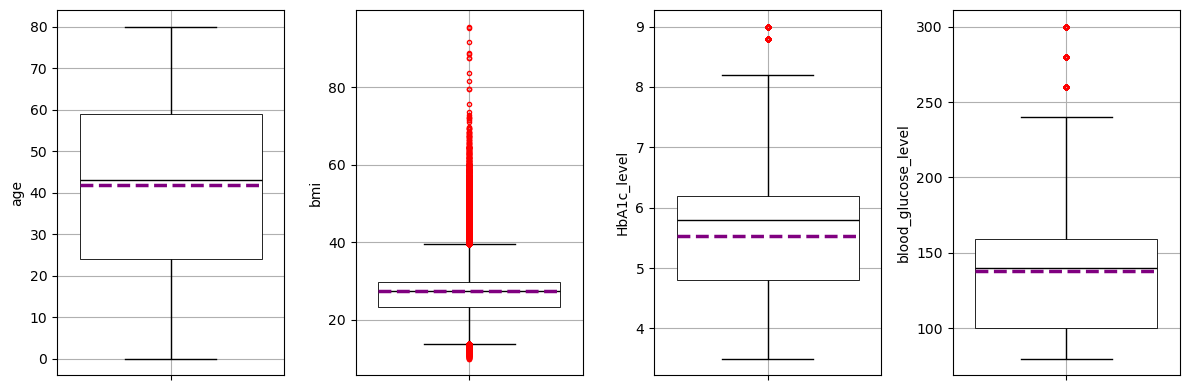

In [16]:
# Show Box Plots for continuous numercial features
num_plots = len(List_con)
print(num_plots)
num_rows = 1  # Add 1 and then floor division to ensure at least 2 rows
num_cols = len(List_con)

boxprops = dict(linestyle='-', linewidth=0.6)
flierprops = dict(marker='o',  
                  markersize=3,
                  markeredgecolor='red')
meanlineprops = dict(linestyle='--', linewidth=2.5, color='purple')

fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 4))

# Flatten the axes array for easy iteration
axes = axes.flatten()

for i, column in enumerate(List_con):
    sns.boxplot(data=data, y=column, ax=axes[i], 
                meanline=True, showmeans=True,
                meanprops = meanlineprops, flierprops = flierprops, boxprops=boxprops, color='w',
                linecolor = 'black')
    axes[i].grid(True)
plt.tight_layout()


4


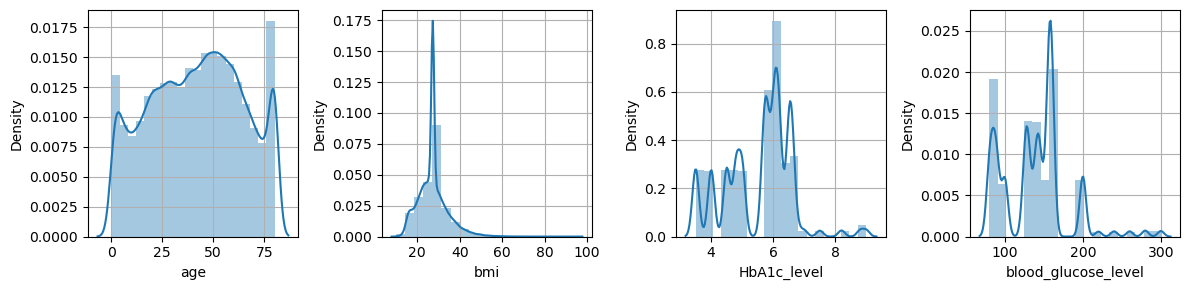

In [17]:
# Show histogram Plots for continuous numercial features
num_plots = len(List_con)
print(num_plots)
num_rows = 1 # Add 1 and then floor division to ensure at least 2 rows
num_cols = (num_plots) //num_rows

fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 3))

# Flatten the axes array for easy iteration
axes = axes.flatten()

for i, column in enumerate(List_con):
    sns.distplot(data[column],  ax=axes[i],  bins = 20, kde=True)
    axes[i].grid(True)
plt.tight_layout()

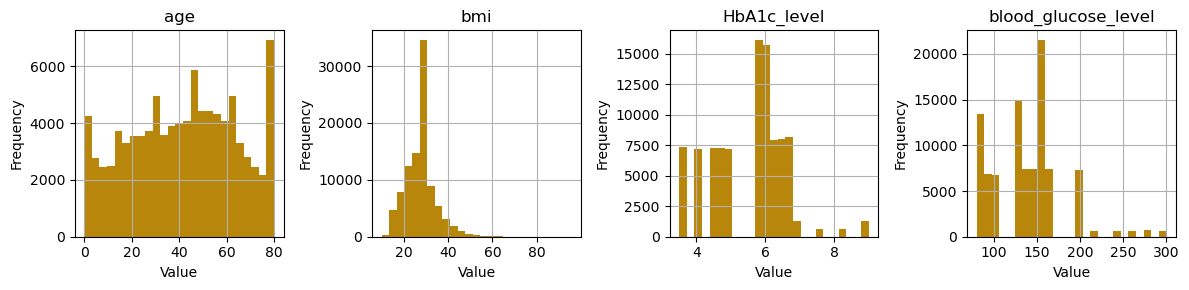

In [18]:
#Histogram for Numeric Columns
# Create a 4x1 grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 3))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate over each numeric column and plot the histogram on a subplot
for i, col in enumerate(List_con):
    data[col].hist(ax=axes[i], bins=25, color='darkgoldenrod')
    axes[i].set_title(col)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')

plt.tight_layout()

#### Insight: 
- BMI is positively skewed and has lots of outliers. HbA1c_level and blood_glucose_level have a few outliers.

In [23]:
# Restrict the data and remove the outliers
datacopy0 = data.copy()
List_rm = List_con.copy()
List_rm.remove('age')
print(List_rm)
List_rm.remove('HbA1c_level')
List_rm.remove('blood_glucose_level')

for i, col in enumerate(List_rm):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1 
    upper = Q3 + 1.5 * IQR
    lower = Q1 - 1.5 * IQR
    datacopy0 = datacopy0[datacopy0[col] > lower]
    datacopy0 = datacopy0[datacopy0[col] < upper]

print(datacopy0.shape)

['bmi', 'HbA1c_level', 'blood_glucose_level']
(90769, 9)


4


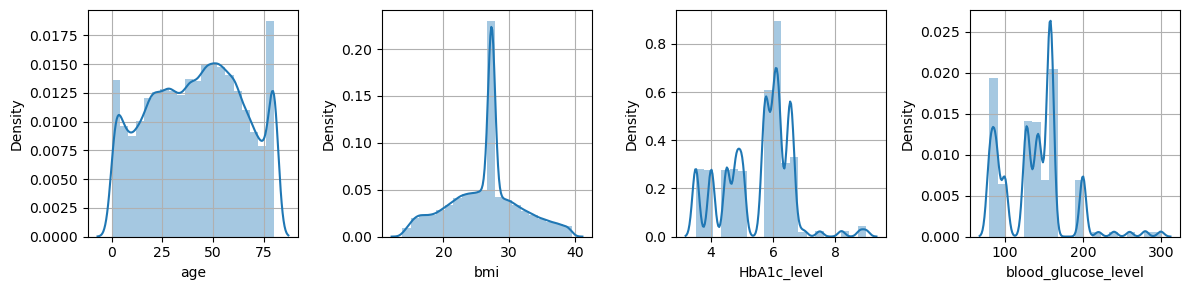

In [24]:
# Show histogram Plots for continuous numercial features again and check the distribution
num_plots = len(List_con)
print(num_plots)
num_rows = 1  # Add 1 and then floor division to ensure at least 2 rows
num_cols = (num_plots) //num_rows

fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 3))

# Flatten the axes array for easy iteration
axes = axes.flatten()

for i, column in enumerate(List_con):
    sns.distplot(datacopy0[column],  ax=axes[i],  bins = 20, kde=True)
    axes[i].grid(True)
plt.tight_layout()

In [25]:
# check skewness of various numerical attributes again
datacopy0[List_con].skew()  

age                   -0.044392
bmi                   -0.041177
HbA1c_level           -0.079533
blood_glucose_level    0.794804
dtype: float64

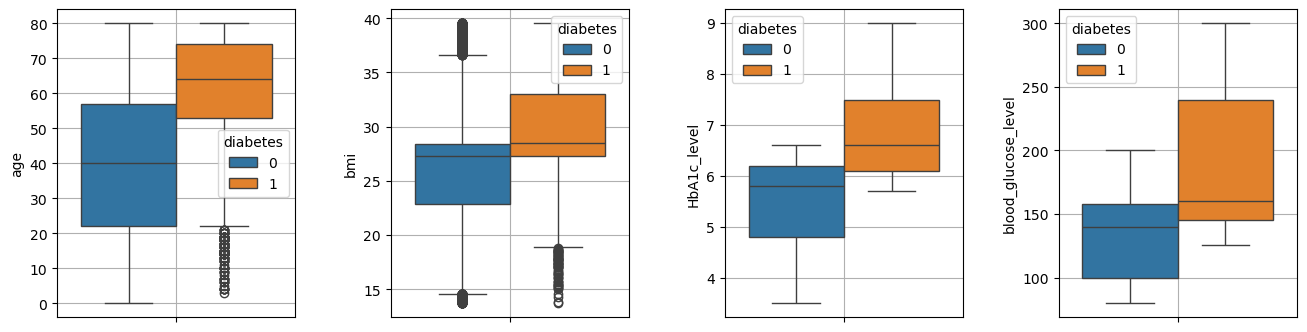

In [26]:
num_plots = len(List_con)
num_rows = 1  # Add 1 and then floor division to ensure at least 2 rows
num_cols = len(List_con)// num_rows

fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 4))
for i, column in enumerate(List_con):
    sns.boxplot(y=column, data=datacopy0, ax = axes[i],  hue='diabetes')
    axes[i].grid(True)

plt.subplots_adjust(hspace=1, wspace=0.4)
plt.show()

##### Insight: 
-  Patients with diagnosis of diabetes are older and with higher BMI, higher HbA1c level, as well as higher blood glucose level.
-  Data attributes are in different scales. By normalizing the data based on standard scalar or min/max scalar, it is expected that model prediction can be improved.
- All the numerical attributes are skewed (shown in above calculation and histogram plots). If skewness is less than zero, then negatively skewed (left tail) and if greater than zero then positively skewed (right tail).  BMI is extremely skewed. We could potentailly apply data transformation to ensure more normal distributed data.
- The outliers exist in the numeric attributes. In particular, we can see that BMI has a lot of extremely larger outliers, the HbA1c_level and blood_gucose_level have a few outliers. These outliers may affect the final prediction. So we decided to drop the outliers.
- After droping the outliers, the negatively skewed attributes include age, bmi, and HbAc_level. blood_glucose_level is positively skewed.

##### b. Bivariate analysis

- Bi-variate analysis between the predictor variables and target column. Comment on findings in terms of their relationship and degree of relation if any. Visualize the analysis using pair plots, heatmap, and so on.

In [27]:
# Apply Label Encoding

datacopy = datacopy0.copy()
desired_gender_cat = {'Female': 0, 'Male': 1}
desired_smoking_cat = {'never':0, 'No Info': 1, 'ever': 2, 'former': 3, 'not current': 4, 'current': 5}

# Fit label encoder and transform data
datacopy['gender'] = [desired_gender_cat[label] for label in datacopy0['gender']]
datacopy['smoking_history'] = [desired_smoking_cat[label] for label in datacopy0['smoking_history']]

print(datacopy.info())
datacopy.head()

<class 'pandas.core.frame.DataFrame'>
Index: 90769 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               90769 non-null  int64  
 1   age                  90769 non-null  float64
 2   hypertension         90769 non-null  int64  
 3   heart_disease        90769 non-null  int64  
 4   smoking_history      90769 non-null  int64  
 5   bmi                  90769 non-null  float64
 6   HbA1c_level          90769 non-null  float64
 7   blood_glucose_level  90769 non-null  int64  
 8   diabetes             90769 non-null  int64  
dtypes: float64(3), int64(6)
memory usage: 6.9 MB
None


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,0,25.19,6.6,140,0
2,1,28.0,0,0,0,27.32,5.7,158,0
3,0,36.0,0,0,5,23.45,5.0,155,0
4,1,76.0,1,1,5,20.14,4.8,155,0
5,0,20.0,0,0,0,27.32,6.6,85,0


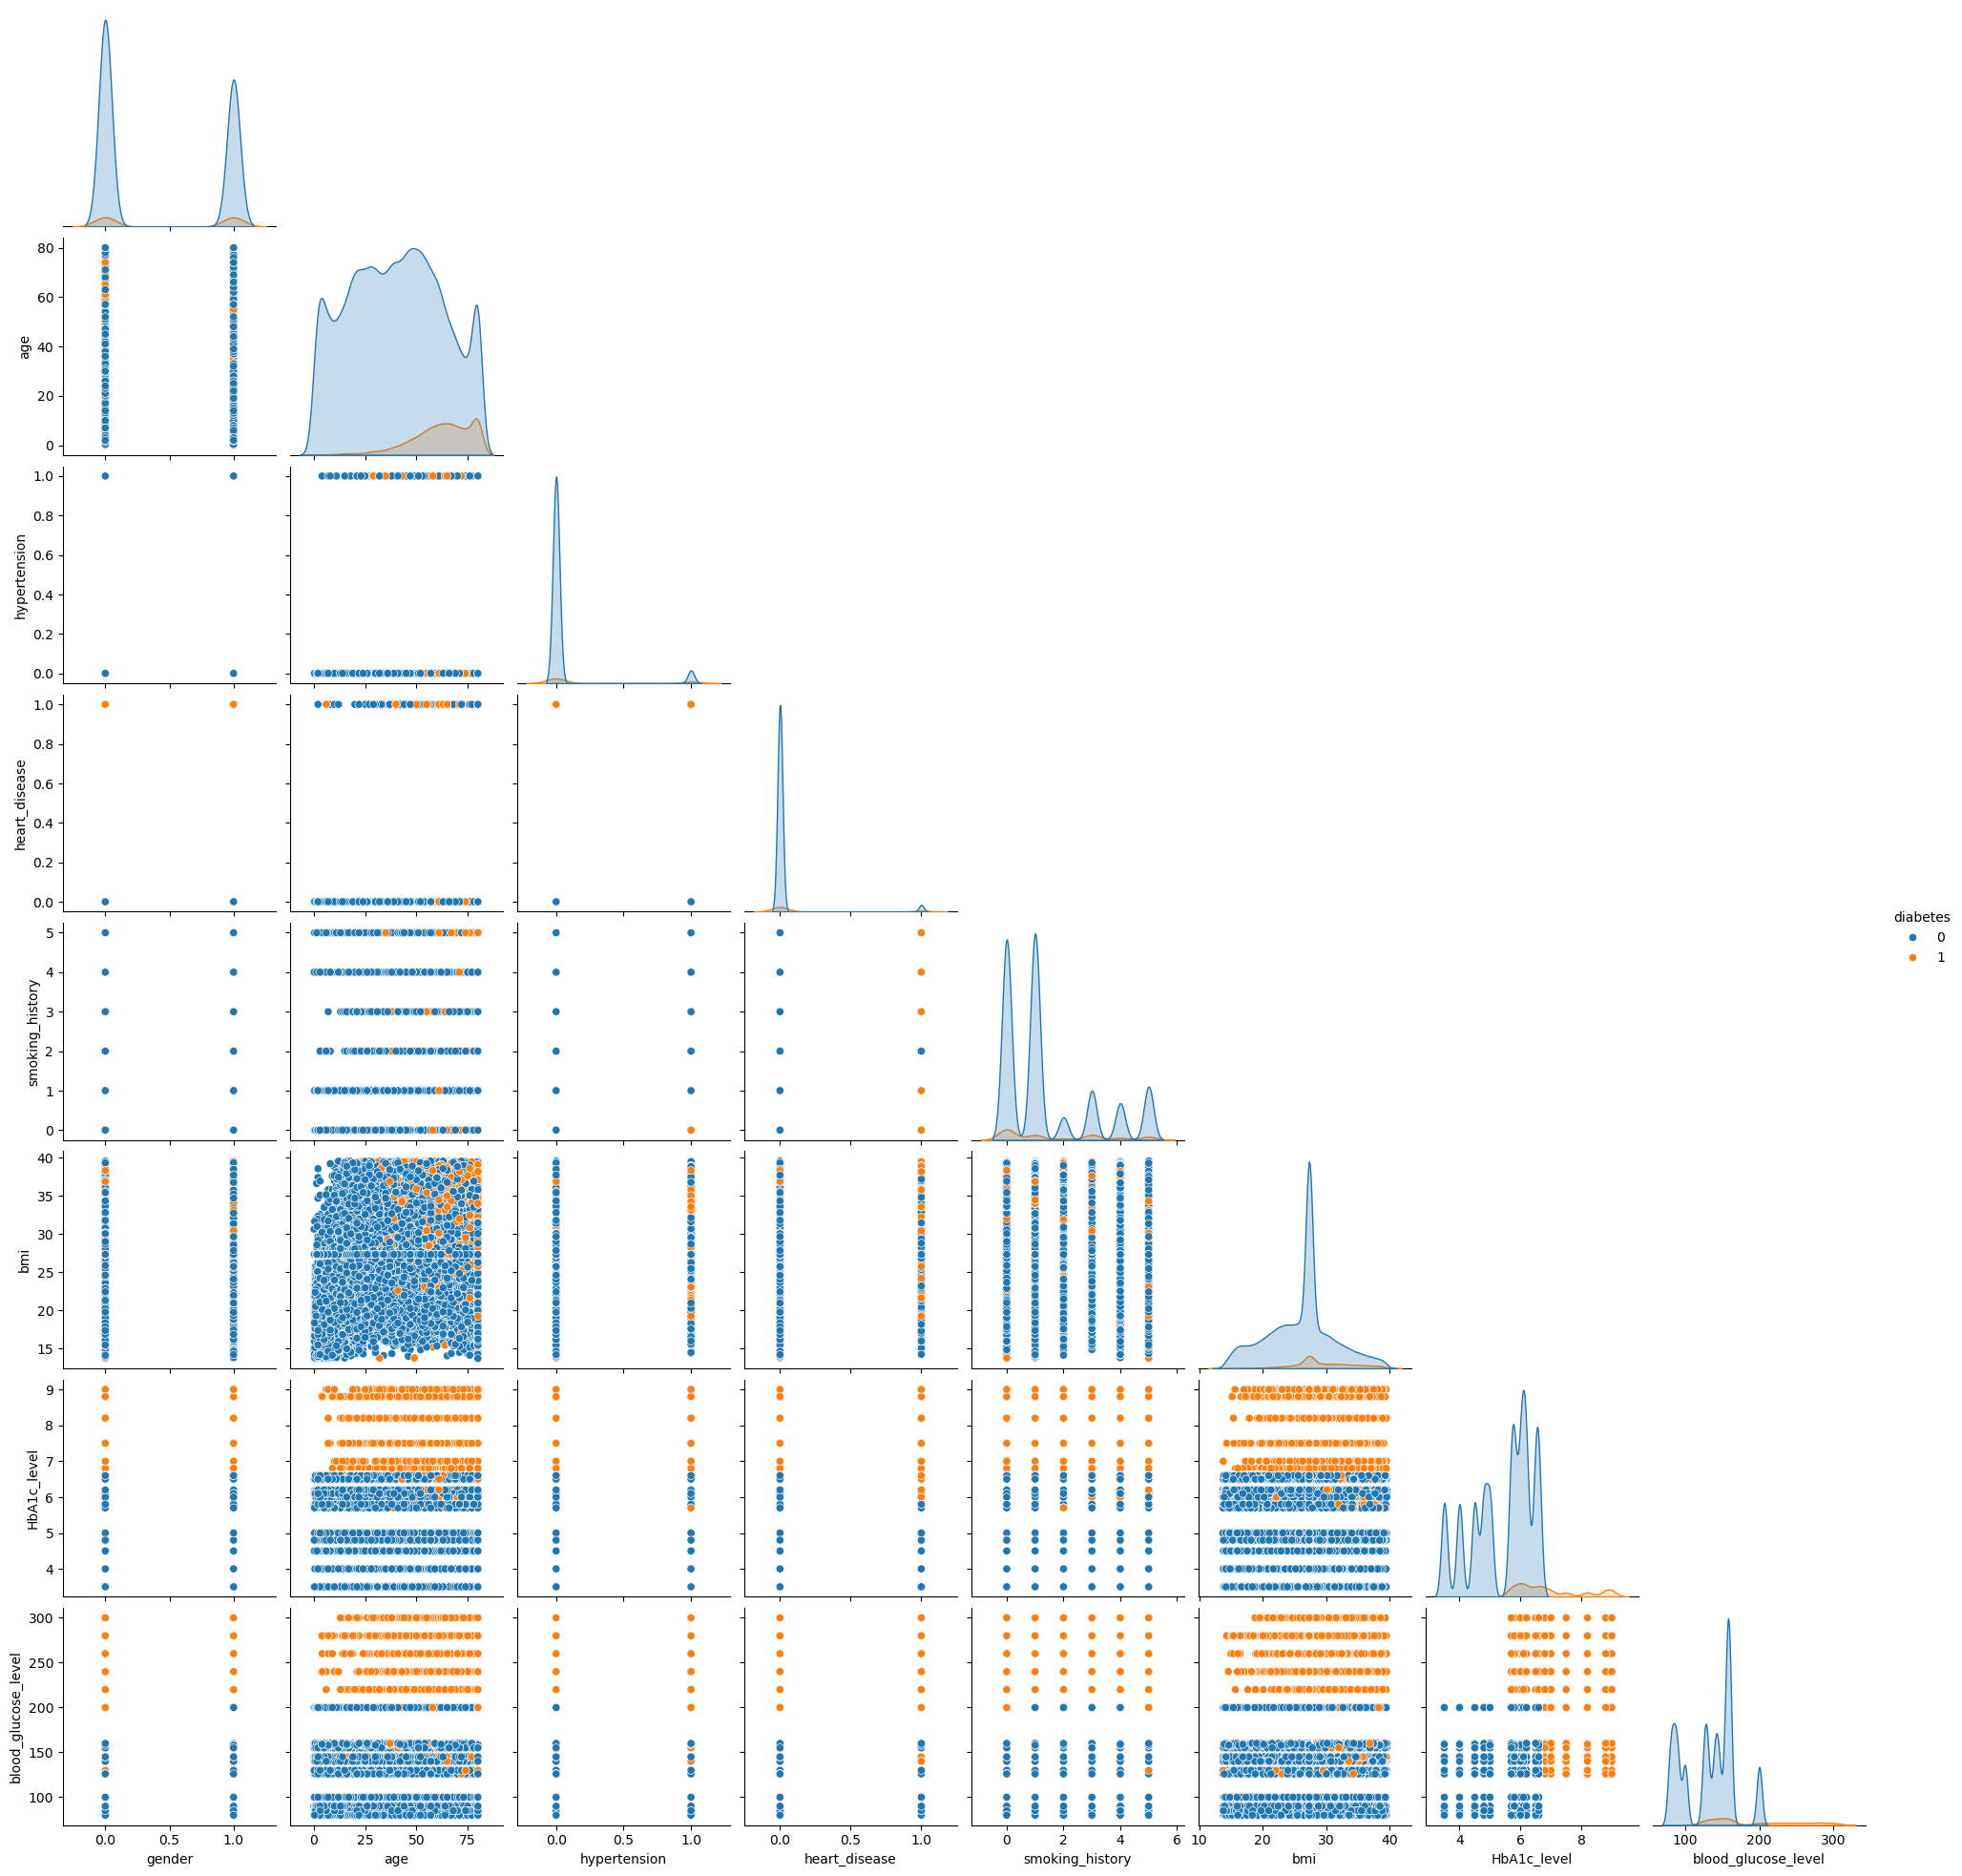

In [28]:
# Pair Plots
sns.pairplot(datacopy,diag_kind='kde',hue ='diabetes',corner=True)                            
plt.show()

In [29]:
# compute the correlation table
datacopy.corr().style.format("{:.2f}")

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
gender,1.00,-0.03,0.02,0.08,0.06,0.02,0.02,0.02,0.04
age,-0.03,1.00,0.26,0.24,0.13,0.41,0.10,0.11,0.26
hypertension,0.02,0.26,1.00,0.12,0.03,0.14,0.08,0.08,0.19
heart_disease,0.08,0.24,0.12,1.00,0.06,0.07,0.07,0.07,0.17
smoking_history,0.06,0.13,0.03,0.06,1.00,0.09,0.02,0.02,0.05
bmi,0.02,0.41,0.14,0.07,0.09,1.00,0.07,0.08,0.18
HbA1c_level,0.02,0.10,0.08,0.07,0.02,0.07,1.00,0.16,0.39
blood_glucose_level,0.02,0.11,0.08,0.07,0.02,0.08,0.16,1.00,0.41
diabetes,0.04,0.26,0.19,0.17,0.05,0.18,0.39,0.41,1.00


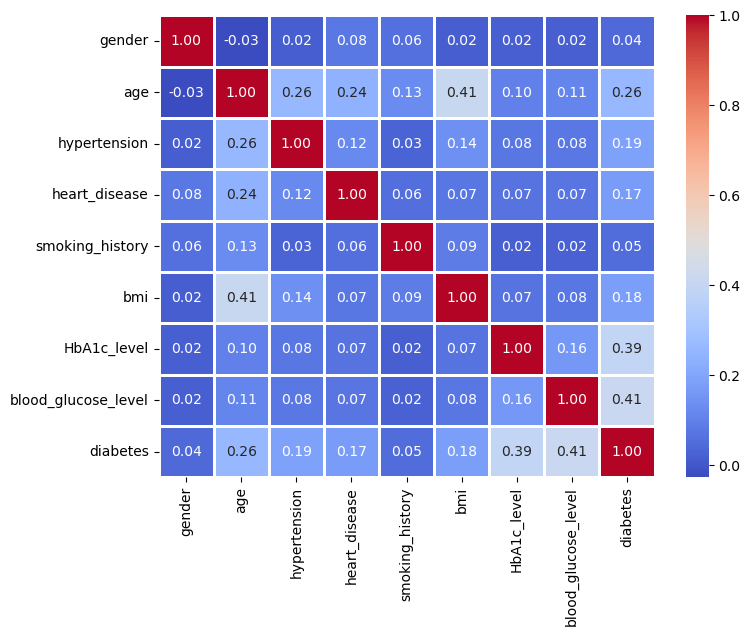

In [30]:
# heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(datacopy.corr(),annot=True, linewidths=1, fmt= '.2f',cmap="coolwarm" )  
plt.show()

##### Insight: 
- We decided to use label encoding instead of one-hot encoding in this scenario. For gender, there are only two categories (will be no difference between one-hot encoding and the label encoding). For smoking_history, the nonsmoker, former smoker, and current smoker will have a different influence on the results. In the label encoding, we set the current smoker using a higher number.  
- We have successfully transformed the categorical values to numerical values. 
- The correlations are output and plotted in a heatmap. Strong correlations are also found between age and bmi. Weak correlations betwen age and hyper tension, age and heart_disease.

#### **<span style="color:darkgoldenrod;"><center>EDA key Summary</center></span>**
* Data has been cleaned to check NA values, remove the duplicates, drop nonsense data values and outliers.
* Both univariate analysis and bivariate analysis are performed for various data attributes.
  - There are two types of attributes in the dataset, categorical and numerical.
  - The counts of the categorical variables are compared by using the bar plots.
  - The summary statistics, skewness, boxplot and histograms are used to visualize the numerical variables.
  - Pair plots are applied to explore the relations between different attributes and target variables.
  - The correlations and heat map are studied.
* Label encoding is carried out to prepare the data frame for further model fitting and prediction.

# 2. Objectives


The goal is to train more than three classification models and compare the model performances. These variations include a simple logistical regression model for binary classification, as well as advanced models such as decision tree classifer, random forest classifer, etc. All models will use the same training and test splits and the same cross-validation method.

- <u> Technical Objective 1: </u> Perform train/validation/test split, then apply standard or min/max scaler to scale the data.
- <u> Technical Objective 2: </u> Apply `Oversampling` or `Undersampling` to generate synthetic datasets and rebalance classes.
- <u> Technical Objective 3: </u> Select models and perform the classification tasks, including logistic regression, random forest, and so on.
- <u> Technical Objective 4: </u> Train model and tuning the hyperparameters.
- <u> Technical Objective 5: </u> Interpret the influence of data attributes on the final target prediction.
- <u> Technical Objective 6: </u> Compare the accuracies between different models in terms of accuracy (such as precision, recall, f1, auc). 

#### Train/Test split

In [31]:
# Define train/validation/test split ratio and random state
test_size = 0.30
random_state= 123

In [32]:
# Prepare the input and output variables
y_col = 'diabetes'
X = datacopy.drop(y_col, axis = 1)
y = datacopy[y_col]
unique_values, counts = np.unique(y, return_counts=True)
print('Negative to Positive in dataset:', counts)

Negative to Positive in dataset: [83555  7214]


In [33]:
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, stratify=y, random_state=random_state) 

In [34]:
# check whether the split is correct
print("{0:0.2f}% data is in training set".format((len(X_train)/len(datacopy.index)) * 100))   
print("{0:0.2f}% data is in test set".format((len(X_test)/len(datacopy.index)) * 100))

70.00% data is in training set
30.00% data is in test set


In [35]:
# check the ratio of nondiabetes vs diabetes in the dataset
unique_values_train, counts_train = np.unique(y_train, return_counts=True)
print('Negative to Positive in train dataset:', counts_train)
unique_values_test, counts_test = np.unique(y_test, return_counts=True)
print('Negative to Positive in test dataset:', counts_test)

Negative to Positive in train dataset: [58488  5050]
Negative to Positive in test dataset: [25067  2164]


In [36]:
imbalance_ratio = counts_train[1]/counts_train[0]
print('The imbalance ratio:', imbalance_ratio )

The imbalance ratio: 0.0863424976063466


# 3. Classification Models


#### i) Apply simple logistic regression model and check results

#### Apply Synthetic Minority Oversampling Technique (SMOTE)

SMOTE first creates many pairs or small clusters with two or more similar instances, the measure by instance distance such as Euclidean distance.
Then, within the boundary of each pair or cluster, SMOTE uniformly permutes features value, one feature at a time, to populate a collection of similar synthesized instances within each pair or cluster.

As a result, SMOTE creates a class-balanced synthetic dataset without adding duplicated instances with minority labels. 

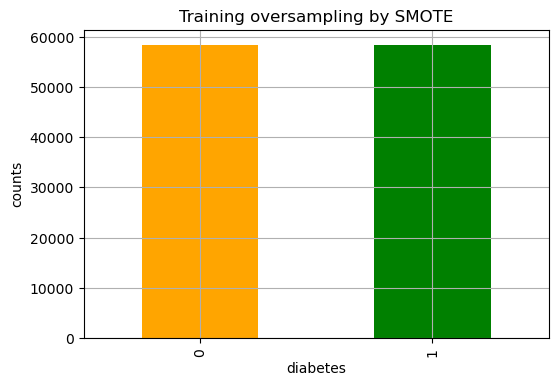

In [48]:
smote_sampler = SMOTE(random_state = random_state)

# Resample training data using SMOTE
X_smo, y_smo = smote_sampler.fit_resample(X_train, y_train)

# Visualize classes
plt.figure(figsize=(6, 4))
y_smo.value_counts().plot.bar(color=['orange', 'green'])
plt.ylabel('counts')
plt.title('Training oversampling by SMOTE')
plt.grid(True)
plt.show()

In [49]:
# apply standard scaler to scale the train data
s = StandardScaler()
X_smo_s = s.fit_transform(X_smo)
X_smo_s_df = pd.DataFrame(X_smo_s, columns=X.columns)

# Build a simple logistic regression model
LRmodel = LogisticRegression(random_state=random_state, 
                              max_iter = 1000)

# Train the model
LRmodel.fit(X_smo_s, y_smo)
X_test_s = s.transform(X_test)
LRpreds = LRmodel.predict(X_test_s)

# Calculate the precision, recall, f5 given the y_test and predictions
# Note that we use beta=5 which means we think the cost of positive class is 5 times of negative class

precision, recall, f_beta, support = precision_recall_fscore_support(y_test, LRpreds, beta=5, pos_label=1, average='binary')
auc = roc_auc_score(y_test, LRpreds)
accuracy = accuracy_score(y_test, LRpreds)
print(f"Accuracy is: {accuracy:.2f}")
print(f"Precision is: {precision:.2f}")
print(f"Recall is: {recall:.2f}")
print(f"Fscore is: {f_beta:.2f}")
print(f"AUC is: {auc:.2f}")

Accuracy is: 0.88
Precision is: 0.38
Recall is: 0.84
Fscore is: 0.80
AUC is: 0.86


In [50]:
#Store the accuracy results for each model in a dataframe for final comparison
resultsDf = pd.DataFrame({'Method':['Logistic Regression with Smote'], 
                          'Accuracy': np.round(accuracy, 2),
                          'Recall': np.round(recall, 2), 
                          'Precision': np.round(precision, 2),
                          'Fscore': np.round(f_beta, 2),
                          'AUC': np.round(auc, 2)})
resultsDf = resultsDf[['Method', 'Accuracy','Recall', 'Precision','Fscore', 'AUC']]
resultsDf

,Method,Accuracy,Recall,Precision,Fscore,AUC
0,Logistic Regression with Smote,0.88,0.84,0.38,0.8,0.86


##### Insight:
- For many machine learning tasks on imbalanced datasets, like diabete diagnosis, we normally care more about recall than precision. The model should be able to find all positives and allow the model to make false-positive errors because the cost of false positives is usually not very high. Failing to recognize positive examples can be life-threatening. Our priority is to improve the model's recall, also keep precision as high as possible. 

#### Undersampling


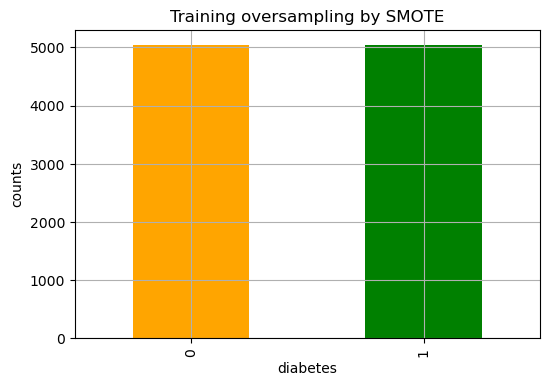

In [51]:
under_sampler = RandomUnderSampler(random_state = random_state)
X_under, y_under = under_sampler.fit_resample(X_train, y_train)

# Visualize classes
plt.figure(figsize=(6, 4))
y_under.value_counts().plot.bar(color=['orange', 'green'])
plt.ylabel('counts')
plt.title('Training oversampling by SMOTE')
plt.grid(True)
plt.show()

In [52]:
# apply standard scaler to scale the train data
s = StandardScaler()
X_under_s = s.fit_transform(X_under)
X_under_s_df = pd.DataFrame(X_under_s, columns=X.columns)

# Build a simple logistic regression model
LRmodel_u = LogisticRegression(random_state=random_state, 
                               max_iter = 1000)

# Train the model
LRmodel_u.fit(X_under_s, y_under)
X_test_s = s.transform(X_test)
LRpreds_u = LRmodel_u.predict(X_test_s)

# Calculate the precision, recall, f5 given the y_test and predictions
# Note that we use beta=5 which means we think the cost of positive class is 5 times of negative class

precision, recall, f_beta, support = precision_recall_fscore_support(y_test, LRpreds_u, beta=5, pos_label=1, average='binary')
auc = roc_auc_score(y_test, LRpreds_u)
accuracy = accuracy_score(y_test, LRpreds_u)
print(f"Accuracy is: {accuracy:.2f}")
print(f"Precision is: {precision:.2f}")
print(f"Recall is: {recall:.2f}")
print(f"Fscore is: {f_beta:.2f}")
print(f"AUC is: {auc:.2f}")

Accuracy is: 0.88
Precision is: 0.39
Recall is: 0.87
Fscore is: 0.83
AUC is: 0.88


In [53]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Logistic Regression with undersampling'], 
                          'Accuracy': np.round(accuracy, 2),
                          'Recall': np.round(recall, 2), 
                          'Precision': np.round(precision, 2),
                          'Fscore': np.round(f_beta, 2),
                          'AUC': np.round(auc, 2)})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf

,Method,Accuracy,Recall,Precision,Fscore,AUC
0,Logistic Regression with Smote,0.88,0.84,0.38,0.80,0.86
0,Logistic Regression with undersampling,0.88,0.87,0.39,0.83,0.88


##### Insight:
- Both the recall, fscore and auc accuracies have been slightly improved by using the undersampling data for training.

#### Class reweighting

For binary classification models, its loss function is normally calculated via a sum of the loss with respect to class 0 and the loss with respect to class 1. By default, their class weights are all 1s meaning we treat each class equally important.

However, since the class distribution is skewed in imbalanced datasets and the loss function optimization process will be dominated by the majority class, we want to help the minority class by increasing its class weight in the loss function.

- Based on their instances portion in the dataset. We assign the weight for the minority class to be 0.93 and weight for the majority class to be 0.07.


In [54]:
class_weight = {}

# Assign weight of class 0 to be 0.07
class_weight[0] = 0.07

# Assign weight of class 1 to be 0.93
class_weight[1] = 0.93

# apply standard scaler to scale the train data
s = StandardScaler()
X_train_s = s.fit_transform(X_train)
X_train_s_df = pd.DataFrame(X_train_s, columns=X.columns)

# Define a logistic regression with weight
LRmodel_w = LogisticRegression(random_state=random_state, 
                              max_iter = 1000,
                              class_weight=class_weight)
# Train the model
LRmodel_w.fit(X_train_s, y_train)
X_test_s = s.transform(X_test)
LRpreds_w = LRmodel_w.predict(X_test_s)

# Calculate the precision, recall, f5 given the y_test and predictions
# Note that we use beta=5 which means we think the cost of positive class is 5 times of negative class

precision, recall, f_beta, support = precision_recall_fscore_support(y_test, LRpreds_w, beta=5, pos_label=1, average='binary')
auc = roc_auc_score(y_test, LRpreds_w)
accuracy = accuracy_score(y_test, LRpreds_w)
print(f"Accuracy is: {accuracy:.2f}")
print(f"Precision is: {precision:.2f}")
print(f"Recall is: {recall:.2f}")
print(f"Fscore is: {f_beta:.2f}")
print(f"AUC is: {auc:.2f}")

Accuracy is: 0.87
Precision is: 0.38
Recall is: 0.88
Fscore is: 0.84
AUC is: 0.88


In [55]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Logistic Regression with Class_reweighting'], 
                          'Accuracy': np.round(accuracy, 2),
                          'Recall': np.round(recall, 2), 
                          'Precision': np.round(precision, 2),
                          'Fscore': np.round(f_beta, 2),
                          'AUC': np.round(auc, 2)})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf

,Method,Accuracy,Recall,Precision,Fscore,AUC
0,Logistic Regression with Smote,0.88,0.84,0.38,0.80,0.86
0,Logistic Regression with undersampling,0.88,0.87,0.39,0.83,0.88
0,Logistic Regression with Class_reweighting,0.87,0.88,0.38,0.84,0.88


##### Insight:
- Compared to the undersampling, the recall/Fscore scores slightly increase, but the prediction/accuracy reduces.

#### ii) Apply decision tree classification model fit and check results

In [61]:
class_weight = {}

# Assign weight of class 0 to be 0.03
class_weight[0] = 0.03

# Assign weight of class 1 to be 0.97
class_weight[1] = 0.97

# apply standard scaler to scale the train data
s = StandardScaler()
X_train_s = s.fit_transform(X_train)
X_train_s_df = pd.DataFrame(X_train_s, columns=X.columns)

# Define a logistic regression with weight
Tmodel_w = DecisionTreeClassifier(random_state=random_state, 
                                  max_depth=10, 
                                  min_samples_leaf = 2, 
                                  min_samples_split = 2,
                                  class_weight=class_weight)


# Train the model
Tmodel_w.fit(X_train_s, y_train)
X_test_s = s.transform(X_test)
Tpreds_w = Tmodel_w.predict(X_test_s)

# Calculate the precision, recall, f5 given the y_test and predictions
# Note that we use beta=5 which means we think the cost of positive class is 5 times of negative class

precision, recall, f_beta, support = precision_recall_fscore_support(y_test, Tpreds_w, beta=5, pos_label=1, average='binary')
auc = roc_auc_score(y_test, Tpreds_w)
accuracy = accuracy_score(y_test, Tpreds_w)
print(f"Accuracy is: {accuracy:.2f}")
print(f"Precision is: {precision:.2f}")
print(f"Recall is: {recall:.2f}")
print(f"Fscore is: {f_beta:.2f}")
print(f"AUC is: {auc:.2f}")

Accuracy is: 0.82
Precision is: 0.30
Recall is: 0.97
Fscore is: 0.89
AUC is: 0.89


In [62]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Decision Tree with Class_reweighting'], 
                          'Accuracy': np.round(accuracy, 2),
                          'Recall': np.round(recall, 2), 
                          'Precision': np.round(precision, 2),
                          'Fscore': np.round(f_beta, 2),
                          'AUC': np.round(auc, 2)})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf

,Method,Accuracy,Recall,Precision,Fscore,AUC
0,Logistic Regression with Smote,0.88,0.84,0.38,0.80,0.86
0,Logistic Regression with undersampling,0.88,0.87,0.39,0.83,0.88
0,Logistic Regression with Class_reweighting,0.87,0.88,0.38,0.84,0.88
0,Decision Tree with Class_reweighting,0.82,0.97,0.30,0.89,0.89


#### ii) Apply random forest classification model fit and check results

In [70]:
class_weight = {}

# Assign weight of class 0 to be 0.03
class_weight[0] = 0.03

# Assign weight of class 1 to be 0.97
class_weight[1] = 0.97

# apply standard scaler to scale the train data
s = StandardScaler()
X_train_s = s.fit_transform(X_train)
X_train_s_df = pd.DataFrame(X_train_s, columns=X.columns)

# Define a logistic regression with weight
RFmodel_w = RandomForestClassifier(random_state=random_state, 
                                   n_estimators = 100,
                                   max_depth = 10, 
                                   min_samples_split = 2,
                                   min_samples_leaf = 2,
                                   class_weight=class_weight)
# Train the model
RFmodel_w.fit(X_train_s, y_train)
X_test_s = s.transform(X_test)
RFpreds_w = RFmodel_w.predict(X_test_s)

# Calculate the precision, recall, f5 given the y_test and predictions
# Note that we use beta=5 which means we think the cost of positive class is 5 times of negative class

precision, recall, f_beta, support = precision_recall_fscore_support(y_test, RFpreds_w, beta=5, pos_label=1, average='binary')
auc = roc_auc_score(y_test, RFpreds_w)
accuracy = accuracy_score(y_test, RFpreds_w)
print(f"Accuracy is: {accuracy:.2f}")
print(f"Precision is: {precision:.2f}")
print(f"Recall is: {recall:.2f}")
print(f"Fscore is: {f_beta:.2f}")
print(f"AUC is: {auc:.2f}")

Accuracy is: 0.81
Precision is: 0.29
Recall is: 0.97
Fscore is: 0.89
AUC is: 0.88


In [71]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Random Forest with Class_reweighting'], 
                          'Accuracy': np.round(accuracy, 2),
                          'Recall': np.round(recall, 2), 
                          'Precision': np.round(precision, 2),
                          'Fscore': np.round(f_beta, 2),
                          'AUC': np.round(auc, 2)})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf

,Method,Accuracy,Recall,Precision,Fscore,AUC
0,Logistic Regression with Smote,0.88,0.84,0.38,0.80,0.86
0,Logistic Regression with undersampling,0.88,0.87,0.39,0.83,0.88
0,Logistic Regression with Class_reweighting,0.87,0.88,0.38,0.84,0.88
0,Decision Tree with Class_reweighting,0.82,0.97,0.30,0.89,0.89
0,Random Forest with Class_reweighting,0.81,0.97,0.29,0.89,0.88


##### Insight:
- We observe similar recall score by applying the random forest classification method, however the other matrices are lower.

#### iv) Hyperparameter tuning using pipeline and grid search

In [72]:
# Realize Polynomial Transformation and model fit using Ridge linear regression analysis with hyperparameter tuning through pipeline

pipe_rf = Pipeline([
              ('scl', StandardScaler()),
              ('classifier', RandomForestClassifier())])

# Define the hyperparameters and the values we want to test
param_grid = {
    'classifier__n_estimators': [10, 20, 100],
    'classifier__max_depth': [None, 10],
    'classifier__min_samples_split': [2, 5],
    'classifier__min_samples_leaf': [2, 4],
    'classifier__class_weight':[{0:0.05, 1:0.95}, {0:0.04, 1:0.96}, {0:0.07, 1:0.93}, {0:0.08, 1:0.92}]
}
grid_rf = GridSearchCV(pipe_rf , param_grid = param_grid, cv = 3, scoring='recall') 

grid_rf.fit(X_train, y_train) 

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scl', StandardScaler()),
                                       ('classifier',
                                        RandomForestClassifier())]),
             param_grid={'classifier__class_weight': [{0: 0.05, 1: 0.95},
                                                      {0: 0.04, 1: 0.96},
                                                      {0: 0.07, 1: 0.93},
                                                      {0: 0.08, 1: 0.92}],
                         'classifier__max_depth': [None, 10],
                         'classifier__min_samples_leaf': [2, 4],
                         'classifier__min_samples_split': [2, 5],
                         'classifier__n_estimators': [10, 20, 100]},
             scoring='recall')

In [73]:
print(" Best cross-validation accuracy: {:.2f}". format( grid_rf.best_score_)) 
print(" Best parameters: ", grid_rf.best_params_) 
print(" Test set accuracy: {:.2f}". format( grid_rf.score( X_test, y_test)))

 Best cross-validation accuracy: 0.97
 Best parameters:  {'classifier__class_weight': {0: 0.04, 1: 0.96}, 'classifier__max_depth': 10, 'classifier__min_samples_leaf': 4, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 100}
 Test set accuracy: 0.96


In [74]:
best_estimator = grid_rf.best_estimator_
print(best_estimator)

Pipeline(steps=[('scl', StandardScaler()),
                ('classifier',
                 RandomForestClassifier(class_weight={0: 0.04, 1: 0.96},
                                        max_depth=10, min_samples_leaf=4))])


In [75]:
best_estimator.fit(X_train, y_train)
y_pred_rf = best_estimator.predict(X_test)

# Calculate the precision, recall, f5 given the y_test and predictions
# Note that we use beta=5 which means we think the cost of positive class is 5 times of negative class

precision, recall, f_beta, support = precision_recall_fscore_support(y_test, y_pred_rf, beta=5, pos_label=1, average='binary')
auc = roc_auc_score(y_test, y_pred_rf)
accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy is: {accuracy:.2f}")
print(f"Precision is: {precision:.2f}")
print(f"Recall is: {recall:.2f}")
print(f"Fscore is: {f_beta:.2f}")
print(f"AUC is: {auc:.2f}")

Accuracy is: 0.82
Precision is: 0.31
Recall is: 0.96
Fscore is: 0.89
AUC is: 0.89


In [76]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['RF + Hyperparameter tuning'], 
                          'Accuracy': np.round(accuracy, 2),
                          'Recall': np.round(recall, 2), 
                          'Precision': np.round(precision, 2),
                          'Fscore': np.round(f_beta, 2),
                          'AUC': np.round(auc, 2)})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf_rset = resultsDf.reset_index(drop=True)
resultsDf_rset

,Method,Accuracy,Recall,Precision,Fscore,AUC
0,Logistic Regression with Smote,0.88,0.84,0.38,0.80,0.86
1,Logistic Regression with undersampling,0.88,0.87,0.39,0.83,0.88
2,Logistic Regression with Class_reweighting,0.87,0.88,0.38,0.84,0.88
3,Decision Tree with Class_reweighting,0.82,0.97,0.30,0.89,0.89
4,Random Forest with Class_reweighting,0.81,0.97,0.29,0.89,0.88
5,RF + Hyperparameter tuning,0.82,0.96,0.31,0.89,0.89


# 4. Insights and key findings


1. We have applied different classification models to analyze the data. These models include a simple logistic regression model (with oversampling, undersampling, and class reweighting methods), decision tree model with class reweighting method, random forest classifier with class reweighting method. Finally, we performed hyperparameter tuning based on the random forest classifier using pipeline and grid search methods.

2. Failing to recognize positive examples can be life-threatening. Therefore, we focused on improving the recall.
   
3. It is shown that the undersampling and the class reweighting methods perform better than the smote method.
   
4. By trying different models, we have successfully enhanced the model prediction accuracy (recall score) from 0.84 to 0.97. The best model is the decision tree classifier with class reweighting factors. 


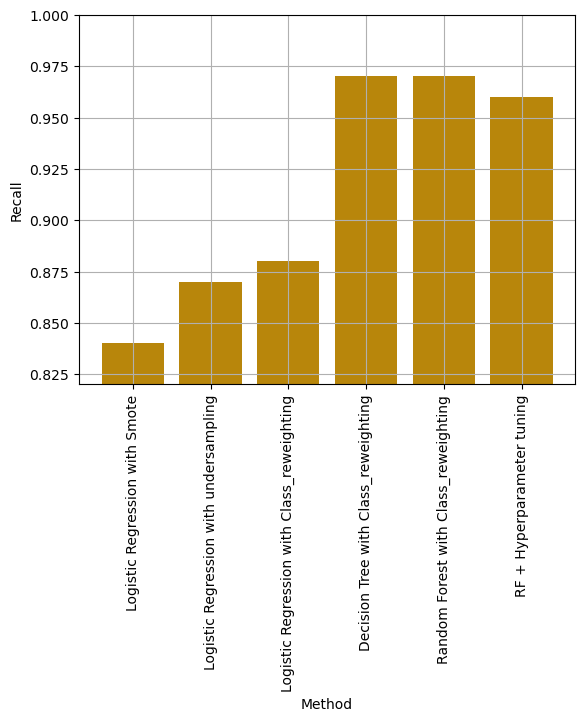

In [79]:
plt.bar(resultsDf_rset['Method'], resultsDf_rset['Recall'], color = 'darkgoldenrod' )

# Add labels and title
plt.xticks(rotation=90)
plt.ylim([0.82,1])
plt.xlabel('Method')
plt.ylabel('Recall')
plt.grid(True)

# 5. Next Steps


1.  In this practice, we applied a label encoding method for the categorical data. We can also apply the one-hot encoding to see whether we can improve the prediction accuracy.

2.  We can combine over- and under-sampling methods for the imbalanced data. 
   
3.  We may further increase the model prediction by trying other classification models. These models include but not limited to Support Vector Machine Classifier, k-Nearest Neighbors (kNN) classifier, Gradient Boosting Classifier, etc.

4.  Investigate the model interpretability by calculating permutation feature importance, using Partial Dependency Plot to illustrate relationships between features and outcomes, building global surrogate models, building local surrogate models using `LIME`.

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
